# Previsão de doenças cardíacas usando árvore de decisão 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importando os dados

In [11]:
dataset = pd.read_csv('heart.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Informações básicas dos dados

In [12]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [67]:
#Idade mínima
dataset.Age.min()

28

In [68]:
#Idade máxima
dataset.Age.max()

77

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Dados sobre os tipos de dores no peito

In [15]:
dataset['ChestPainType'] = dataset.ChestPainType.replace({'ASY': 'Assintomático',
                                             'ATA': 'Angina atípica',
                                             'NAP': 'Dor Não Anginal',
                                              'TA': 'Angina típica'})
dataset['ChestPainType'].value_counts()

Assintomático      496
Dor Não Anginal    203
Angina atípica     173
Angina típica       46
Name: ChestPainType, dtype: int64

## Quantidade de pacientes com doença cardíaca

In [16]:
NAO = dataset.value_counts(["HeartDisease"])[0]
SIM = dataset.value_counts(["HeartDisease"])[1]
print("Paciêntes sem doença cardíaca" + ' ' + str(NAO) +"." )
print("Paciêntes com doença cardíaca" + ' ' + str(SIM) +"." )

Paciêntes sem doença cardíaca 410.
Paciêntes com doença cardíaca 508.


## Gráficos para os sexos

<AxesSubplot:xlabel='Sex', ylabel='count'>

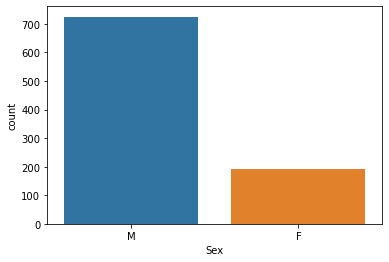

In [26]:
import seaborn as sns
sns.countplot(x='Sex',data = dataset)

## Estratificação

<AxesSubplot:xlabel='Sex', ylabel='count'>

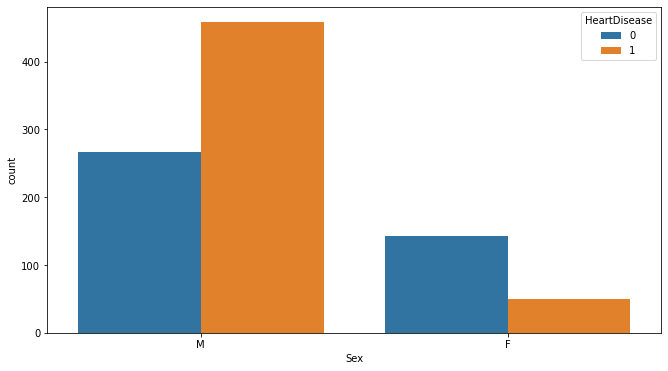

In [21]:
fig=plt.figure(figsize=(11,6))
sns.countplot(x='Sex',hue='HeartDisease',data=dataset)

## Mapa de calor

<AxesSubplot:title={'center':'Mapa de correlação de todos os parâmetros'}>

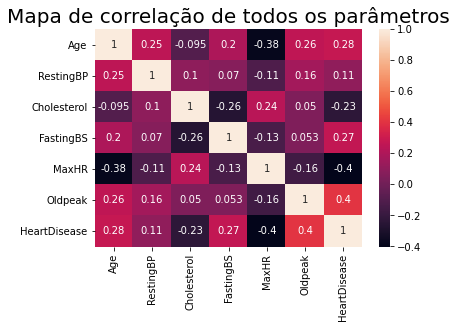

In [22]:
plt.title("Mapa de correlação de todos os parâmetros", fontsize = 20)
sns.heatmap(dataset.corr(), annot=True)

## Curva de densidades

<AxesSubplot:xlabel='Age', ylabel='Density'>

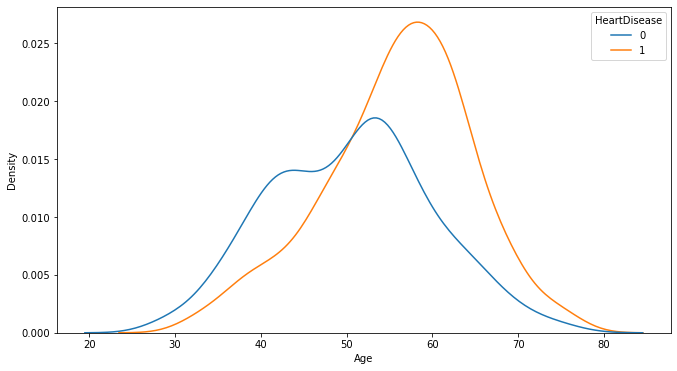

In [25]:
fig=plt.figure(figsize=(11,6))
sns.kdeplot(dataset['Age'],hue = dataset['HeartDisease'])

## Lidando com as variáveis categóricas

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,6,8,10])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

## Dividindo o conjunto de dados no conjunto de treinamento e conjunto de teste

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

## Dimensionamento de recursos (Feature Scaling)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Treinando o modelo de classificação de árvore de decisão no conjunto de treino

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',
                                    random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Comparando o previsto com o resultado real

In [33]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]

## Porcentagem de Acerto

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
a=accuracy_score(y_test,y_pred)*100
print('Acertos do modelo',"%.2f" % a, '%')

[[ 72  20]
 [ 16 122]]
Acertos do modelo 84.35 %


## Contagem dos erros

In [48]:
mistakes = 0
Array = y_test.reshape(-1, 1) 
for i in range(len(y_pred)):
    if (y_pred[i] != Array[i]):
        mistakes += 1        

In [51]:
'Número de erros = ',mistakes

('Número de erros = ', 36)

In [52]:
'Número total de predições = ', len(y_pred)     

('Número total de predições = ', 230)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        92
           1       0.86      0.88      0.87       138

    accuracy                           0.84       230
   macro avg       0.84      0.83      0.84       230
weighted avg       0.84      0.84      0.84       230

